# Audio Data Augmentation Tutorial
## These techniques serve to enable us to combat overfitting when training a model

Work is derived from this research paper that used speed perturbation and tempo perturbation as a mean of augmenting a speech recognition algorithm: https://www.danielpovey.com/files/2015_interspeech_augmentation.pdf

The librosa functionality is derived from this medium article: https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

Please note that if you run this script it will produce alternative wav files for you to listen to. Code will need adjustments for different filetypes

In [1]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import scipy
from scipy.io import wavfile
import sox

## Plotting Baseline Signal Containing Rainforest Audio

In [2]:
AudioClip = "AudiomothSample.wav"
SIGNAL,SAMPLE_RATE = librosa.load(AudioClip,sr=384000)

Text(0.5, 1.0, 'Audiomoth Sample Pure Signal Waveform')

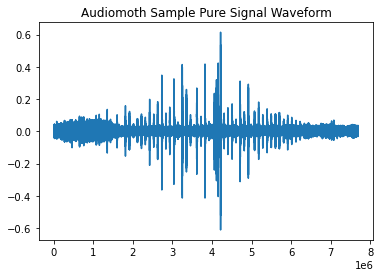

In [3]:
plt.plot(SIGNAL)
plt.title("Audiomoth Sample Pure Signal Waveform")

Text(0.5, 1.0, 'Audiomoth Sample Pure Signal Spectrogram')

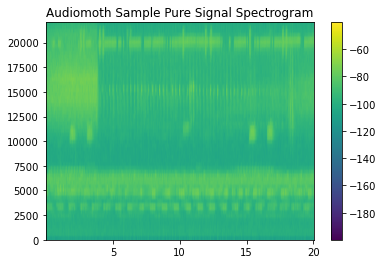

In [4]:
arr = plt.specgram(SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Pure Signal Spectrogram")

## Pitch Augmentation 

Pitch Modulation Factor:  0.99


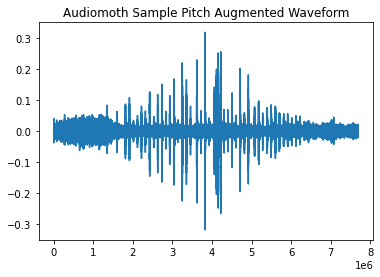

In [5]:
#This methodology was found in the medium article
#In practice we probably want a <1x and >1x pitch/tempo/speed copy
PITCH_FACTOR = round(np.random.uniform(low=.9,high=1.1),2)
print("Pitch Modulation Factor: ",PITCH_FACTOR )
PITCH_MODULATED_SIGNAL = librosa.effects.pitch_shift(SIGNAL,SAMPLE_RATE,PITCH_FACTOR)
plt.plot(PITCH_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Pitch Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "PitchAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,PITCH_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Pitch Augmented Waveform')

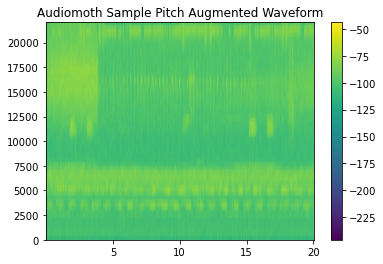

In [6]:
arr = plt.specgram(PITCH_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Pitch Augmented Waveform")

## Noise Augmentation

In [7]:
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

Noise Modulation Factor:  0.005


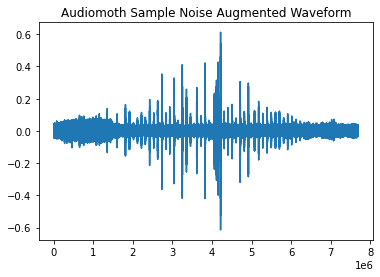

In [8]:
#The noise scalar I adjust based off of the amplitudes of the signal being passed in. More work has to be done here.
NOISE_FACTOR = round(np.random.uniform(low=.001,high=.02),3)
print("Noise Modulation Factor: ",NOISE_FACTOR)
NOISE_MODULATED_SIGNAL = manipulate(SIGNAL,NOISE_FACTOR)
plt.plot(NOISE_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Noise Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "NoiseAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,PITCH_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Noise Augmented Spectrogram')

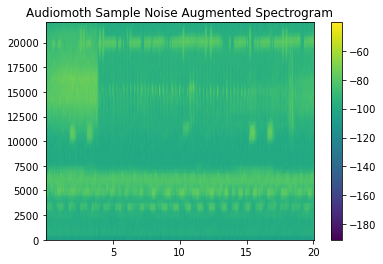

In [9]:
arr = plt.specgram(NOISE_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Noise Augmented Spectrogram")

## Speed Augmentation
There is overlap between this and Pitch Augmentation, since as you increase the speed, you increase the pitch.

Speed Modulation Factor:  1.05


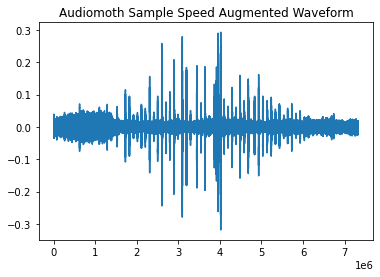

In [10]:
SPEED_FACTOR = round(np.random.uniform(low = 0.9, high = 1.1),2)
print("Speed Modulation Factor: ",SPEED_FACTOR)
SPEED_MODULATED_SIGNAL = librosa.effects.time_stretch(SIGNAL,SPEED_FACTOR)
plt.plot(SPEED_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Speed Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "SpeedAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,SPEED_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Speed Augmented Spectrogram')

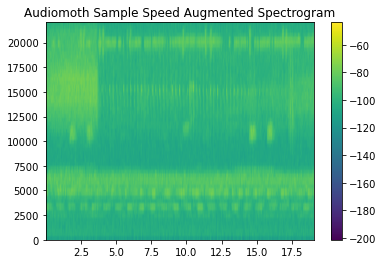

In [11]:
arr = plt.specgram(SPEED_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Speed Augmented Spectrogram")

## Tempo Augmentation

### Librosa doesn't seem to have a clean way to implement this, so I am using pySoX 
Unfortunately Pysox doesn't simply manipulate a numpy array as far as I can tell.

How to work with transformer class: 

https://pysox.readthedocs.io/en/latest/example.html

Tempo functionality that is implemented here:

https://pysox.readthedocs.io/en/latest/api.html#sox.transform.Transformer.tempo

In [12]:
TEMPO_FACTOR = round(np.random.uniform(low = 0.9, high = 1.1),2)
tempoTransformer = sox.Transformer()
tempoTransformer.tempo(TEMPO_FACTOR)
tempoTransformer.build(AudioClip,AudioClip.split('.')[0] + "TempoAugmented." + AudioClip.split('.')[1])

True

Tempo Modulation Factor:  1.1


Text(0.5, 1.0, 'Audiomoth Sample Tempo Augmented Waveform')

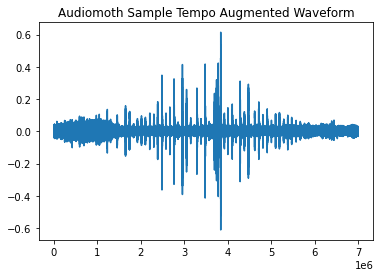

In [13]:
TEMPO_MODULATED_SIGNAL,SAMPLE_RATE = librosa.load(AudioClip.split('.')[0] + "TempoAugmented." + AudioClip.split('.')[1],sr=384000)
print("Tempo Modulation Factor: ",TEMPO_FACTOR)
plt.plot(TEMPO_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Tempo Augmented Waveform")

Text(0.5, 1.0, 'Audiomoth Sample Tempo Augmented Spectrogram')

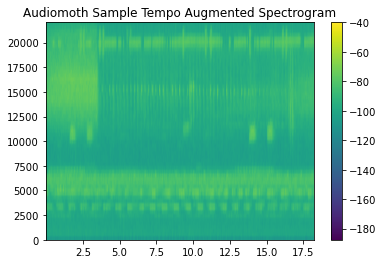

In [14]:
arr = plt.specgram(TEMPO_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Tempo Augmented Spectrogram")